#Credit Card Fraud Detection
Credit card transactions have become a cornerstone of modern society, facilitating financial exchanges across the globe. However, with the exponential growth of online payments and electronic transactions, opportunities for fraud in this domain have also multiplied. Ensuring the security of credit card transactions has therefore become a major concern for both consumers and credit card issuers.

The importance of detecting fraudulent credit card transactions cannot be overstated. Nobody wants to be the victim of credit card fraud, where unauthorized purchases are made in their name. Consequently, it is imperative that credit card companies are able to quickly recognize and identify fraudulent transactions.

In this project, we will explore machine learning methods and algorithms used for detecting fraud in credit card transactions. By applying supervised learning techniques, we aim to identify subtle patterns that may indicate fraudulent activity.


# I - Data -processing

## I.1 - Import the libraries.

In [30]:
import numpy as np
import pandas as pd
import csv
import time
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score, recall_score,precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## I.2 - Uploading Data

**Database Description**

Dataset Source : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

The dataset contains credit card transactions carried out by European cardholders in September 2013.

It includes transactions recorded over a two-day period, with a total of 492 fraud cases out of 284,807 transactions. The dataset is highly imbalanced, as the positive class (fraud) accounts for only 0.172% of all transactions.

The features of the transactions are represented by variables V1 through V28, along with the “Amount” and “Time” variables. The target variable “Class” serves as the response variable, taking the value 1 in the case of fraud and 0 otherwise. For security reasons, the original names of the variables have not been disclosed.

Before applying classification methods, it is necessary to first analyze the dataset.


In [32]:
data = pd.read_csv("/content/creditcard.csv",sep=',', header = 0)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [33]:
#Display the data dimentionality
print("Data Dimensionality : ", data.shape)

#Display data types
print(data.dtypes)

Data Dimensionality :  (284807, 31)
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


## I.3 - Exploration of Relationships and Features

The database contains 284,807 observations and 31 variables.

1. Display the descriptive statistics of the dataset.

2. Check if there are some missing values

3. Display the boxplots of all variables. Checking for outliers.

4. Display the correlation matrix of the variables. Checking for Variables that are strongly correlated.

In [34]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [35]:
#Null Values Check
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


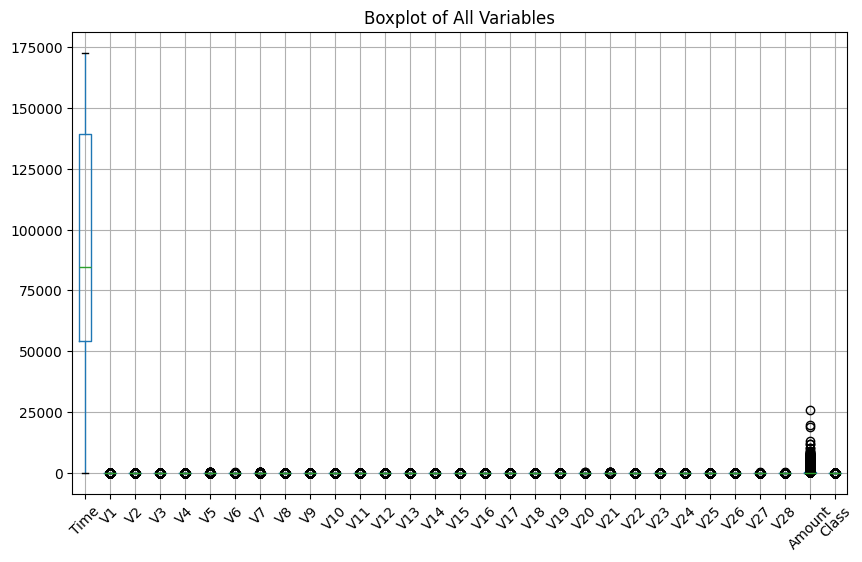

In [ ]:
#plotting boxplots
data.boxplot(figsize=(10, 6))
plt.title("Boxplot of All Variables")
plt.xticks(rotation=45)
plt.show()

There are too many outliers in **Amount** Column

In [ ]:
# Correlation
corr_mat=data.corr()
res=corr_mat["Class"].sort_values(ascending=False)
print(res)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


## I.4 - Data scaling

To achieve better classification performance, it is necessary to reduce the undesirable effects of outliers by scaling the data to a standard range.

In [ ]:
#Data standarization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

scaled_data = pd.DataFrame(data_scaled, columns = data.columns)

In [ ]:
# verification
scaled_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,-0.041599
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,-0.041599
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,-0.041599
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,-0.041599
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,-0.041599


## I.5 - Splitting the data into input (X) and output (Y)

In [ ]:
#Splitting the data into input (X) and output (Y)
X = scaled_data.drop(columns=["Class"]).values
Y = scaled_data["Class"].values

print(X.shape, Y.shape)

(284807, 30) (284807,)



###  Display the degree of imbalance in the data

1. Quantify imbalance → calculate the proportion of majority (non-fraud) and minority (fraud) classes.

2. Visualize imbalance → graph the distribution of classes to highlight the imbalance.


Class distribution (counts):
 Class
0    284315
1       492
Name: count, dtype: int64

Class distribution (percentages):
 Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


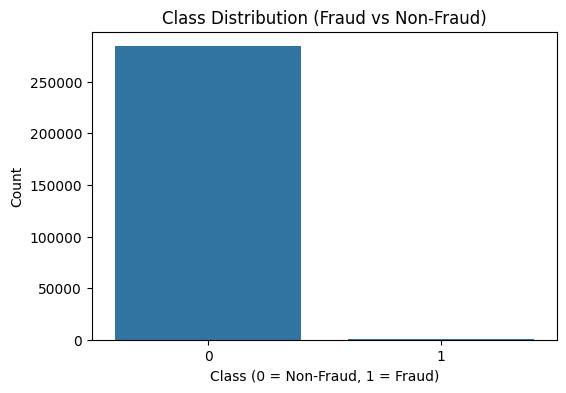

In [ ]:
# Quantify imbalance
class_counts = data['Class'].value_counts()
class_percentages = data['Class'].value_counts(normalize=True) * 100

print("Class distribution (counts):\n", class_counts)
print("\nClass distribution (percentages):\n", class_percentages)

plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data)
plt.title("Class Distribution (Fraud vs Non-Fraud)")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

The target variable "Class" is unbalanced, it contains 99.83% non-fraudulent transactions (negative class) and 0.17% fraud (positive class).

## I.6 - Split train/test data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(199364, 30) (85443, 30) (199364,) (85443,)


After the splitting, the training base contains 199,364 observations, while the test base contains 85,443 observations.

# II- Balancing training data

To avoid any overfitting or underfitting effects, it is imperative to achieve an optimal balance in data handling. In the next section, we will undertake classification using balanced data, employing two specific balancing techniques:

**SMOTE** : A data balancing technique that involves generating synthetic examples for the minority class by creating artificial observations similar to existing samples, in order to balance the class distribution.

**B-SMOTE**: A variant of SMOTE that specifically focuses on examples from the minority class located near the decision boundary, generating synthetic data to strengthen these crucial areas for classification.

1. Make a copy of the training data `x_train1`(we will use it for cost sensitive solution with Random Forest)
2. Create a new balanced training data with  SMOTE (`x_train2`)
3. Create an other balanced training date with B-SMOTE (`x_train3`)


In [ ]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE

# Separate features and target first
X = data.drop(columns=['Class'])
Y = data['Class']  # Keep original 0/1 values

# Scale only features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(
    X_scaled, Y, test_size=0.3, random_state=0, stratify=Y
)

# create a first copy of x_train
x_train1, y_train1 = x_train.copy(), y_train.copy()

# Create a balanced set x_train2 using SMOTE
smote = SMOTE(random_state=0)
x_train2, y_train2 = smote.fit_resample(x_train, y_train)

# Create an other balanced set x_train3 using Borderline SMOTE
bsmote = BorderlineSMOTE(random_state=0)
x_train3, y_train3 = bsmote.fit_resample(x_train, y_train)

print("Original training set shape:", x_train.shape, y_train.shape)
print("After SMOTE:", x_train2.shape, y_train2.shape)
print("After Borderline-SMOTE:", x_train3.shape, y_train3.shape)



Original training set shape: (199364, 30) (199364,)
After SMOTE: (398040, 30) (398040,)
After Borderline-SMOTE: (398040, 30) (398040,)


##Subset Sampling

After Applying SMOTE and B-SMOTE, the dataset now contains a huge number of samples. It would be very time consuming to train the models such as Random Forest and SVM in the next step. To avoid this and speed up the computation, We will randomly sample a small amount of training data while preserving the overall distribution. This approach allows faster training and testing during the development phase, without significantly affecting the relative performance trends of the models.

In [ ]:
# Resetting index before sampling
y_train1 = y_train1.reset_index(drop=True)
y_train2 = y_train2.reset_index(drop=True)
y_train3 = y_train3.reset_index(drop=True)

# Fraction of the training data to use
sample_frac = 0.2  # Use 20%

# Function for sampling
def sample_data(X, y, frac=0.2, random_state=0):
    n_samples = int(len(X) * frac)
    np.random.seed(random_state)
    indices = np.random.choice(len(X), n_samples, replace=False)

    # Works for both numpy arrays and pandas DataFrames/Series
    if isinstance(X, (pd.DataFrame, pd.Series)):
        X_sampled = X.iloc[indices]
    else:
        X_sampled = X[indices]

    if isinstance(y, (pd.DataFrame, pd.Series)):
        y_sampled = y.iloc[indices]
    else:
        y_sampled = y[indices]

    return X_sampled, y_sampled

x_train1_s, y_train1_s = sample_data(x_train1, y_train1, sample_frac)
x_train2_s, y_train2_s = sample_data(x_train2, y_train2, sample_frac)
x_train3_s, y_train3_s = sample_data(x_train3, y_train3, sample_frac)

print("After sampling:")
print("Cost-Sensitive data:", x_train1_s.shape)
print("SMOTE data:", x_train2_s.shape)
print("B-SMOTE data:", x_train3_s.shape)

After sampling:
Cost-Sensitive data: (39872, 30)
SMOTE data: (79608, 30)
B-SMOTE data: (79608, 30)


# III-  Classification with balanced data

## III-1  Classification with Random Forest


To create the Random Forest classification models as we've outlined, we'll need to follow a structured approach. Here is a plan to implement each of the three models,

1. **First Model: Cost-Sensitive Learning with class_weight** :
For this model, we'll train a Random Forest on the original, imbalanced dataset (`x_train1`). The key is to use the class_weight parameter to penalize misclassifications of the minority class. This technique modifies the learning algorithm's cost function without altering the data itself.

2. **Second Model: SMOTE Balanced Data**
The second model will use a dataset that has been balanced using the SMOTE (`x_train2`)
3. **Third Model: B-SMOTE Balanced Data**
The third model is similar to the second, but it uses the Borderline-SMOTE (B-SMOTE) (`x_train3`)



We'll be using the sample data (`x_train1_s`), (`x_train2_s`), (`x_train3_s`) for the further training

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

#First Model - Cost-Sensitive Random Forest

# Initialize classifier with class weights
rf_cost_sensitive = RandomForestClassifier(n_estimators=100, random_state=0, class_weight='balanced')

# Train
rf_cost_sensitive.fit(x_train1_s, y_train1_s)

# Predict on test set
y_pred1 = rf_cost_sensitive.predict(x_test)

print('Random Forest with Cost-Sensitive Data')
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))
print("ROC-AUC:", roc_auc_score(y_test, rf_cost_sensitive.predict_proba(x_test)[:,1]))

Random Forest with Cost-Sensitive Data
[[85287     8]
 [   51    97]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.92      0.66      0.77       148

    accuracy                           1.00     85443
   macro avg       0.96      0.83      0.88     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC: 0.9305053368040648


It Achieved high accuracy and precision(92%) and also correctly identified most of the non-fraud transactions while keeping false positives low. But the recall for 'fraud' class is moderate as some fraud cases were missed. Overall the 0.93 of ROC-AUC demonstrates how well the model classified fraud and non-fraud transactions.

In [ ]:
#Second Model - SMOTE Balanced Data

rf_smote = RandomForestClassifier(n_estimators=100, random_state=0)

rf_smote.fit(x_train2_s, y_train2_s)

y_pred2 = rf_smote.predict(x_test)

print("Random Forest with SMOTE")
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))
print("ROC-AUC:", roc_auc_score(y_test, rf_smote.predict_proba(x_test)[:,1]))


Random Forest with SMOTE
[[85257    38]
 [   28   120]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.76      0.81      0.78       148

    accuracy                           1.00     85443
   macro avg       0.88      0.91      0.89     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC: 0.9873060586232518


It achieved high accuracy and improved recall for the 'fraud' class (81%), correctly identifying more fraud cases compared to the first model. Precision remained strong (76%), and most non-fraud transactions were still classified correctly. Overall, the ROC-AUC of 0.99 demonstrates excellent ability of the model to distinguish between fraud and non-fraud transactions.

In [ ]:
#Third Model - B-SMOTE Balanced Data

rf_bsmote = RandomForestClassifier(n_estimators=100, random_state=0)

rf_bsmote.fit(x_train3_s, y_train3_s)

y_pred3 = rf_bsmote.predict(x_test)

print("Random Forest with Borderline-SMOTE")
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))
print("ROC-AUC:", roc_auc_score(y_test, rf_bsmote.predict_proba(x_test)[:,1]))


Random Forest with Borderline-SMOTE
[[85273    22]
 [   34   114]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.84      0.77      0.80       148

    accuracy                           1.00     85443
   macro avg       0.92      0.89      0.90     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC: 0.9622503695441734


It was able to achieve high accuracy while balancing precision (84%) and recall (77%) for the 'fraud' class, correctly identifying more fraud cases than the first model and slightly fewer than the SMOTE model. Most non-fraud transactions were still classified correctly, and achieved ROC-AUC of 0.96.

## III- 2- SVM with balanced data
Similarly, in this section we will create three classification models using SVMs as follows:


1.  **First Model: Cost-Sensitive Learning with class_weight** :
For this model, we'll train a Random Forest on the original, imbalanced dataset (`x_train1`). The key is to use the class_weight parameter to penalize misclassifications of the minority class.
2. **Second Model: SMOTE Balanced Data** will use a dataset  balanced with SMOTE (`x_train2`)
3.  **Third Model: B-SMOTE Balanced Data** will use a dataset  balanced with B-SMOTE (`x_train3`)



In [ ]:
from sklearn.svm import SVC

#First Model - Cost-Sensitive SVM
svm_cost_sensitive = SVC(
    kernel='rbf',
    class_weight='balanced',
    probability=True,  # Needed for ROC-AUC
    random_state=0
)

svm_cost_sensitive.fit(x_train1_s, y_train1_s)

y_pred_svm1 = svm_cost_sensitive.predict(x_test)

print("Cost-Sensitive SVM")
print(confusion_matrix(y_test, y_pred_svm1))
print(classification_report(y_test, y_pred_svm1))
print("ROC-AUC:", roc_auc_score(y_test, svm_cost_sensitive.predict_proba(x_test)[:,1]))


Cost-Sensitive SVM
[[85261    34]
 [   83    65]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.66      0.44      0.53       148

    accuracy                           1.00     85443
   macro avg       0.83      0.72      0.76     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC: 0.9491671987363411


It's performance on the minority (fraud) class was lower, with a recall of 44%, meaning many fraud cases were missed. Precision was 66%, showing that most predicted frauds were correct. The ROC-AUC of 0.95 indicates that the model still has strong ability to distinguish between fraud and non-fraud, but it is more conservative in detecting minority cases compared to the Random Forest models.

In [ ]:
#Second Model - SVM with SMOTE Balanced Data
svm_smote = SVC(
    kernel='rbf',
    probability=True,
    random_state=0
)

svm_smote.fit(x_train2_s, y_train2_s)

y_pred_svm2 = svm_smote.predict(x_test)

print("SVM with SMOTE")
print(confusion_matrix(y_test, y_pred_svm2))
print(classification_report(y_test, y_pred_svm2))
print("ROC-AUC:", roc_auc_score(y_test, svm_smote.predict_proba(x_test)[:,1]))


SVM with SMOTE
[[84189  1106]
 [   20   128]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.10      0.86      0.19       148

    accuracy                           0.99     85443
   macro avg       0.55      0.93      0.59     85443
weighted avg       1.00      0.99      0.99     85443

ROC-AUC: 0.9848025849872382


The SVM trained on SMOTE-balanced data significantly improved recall for the 'fraud' class, detecting 86% of actual fraud cases. However, precision dropped to 10%, meaning many non-fraud transactions were incorrectly flagged as fraud. Overall accuracy remained very high at 99%, and the ROC-AUC of 0.98 demonstrates excellent discrimination between fraud and non-fraud transactions. This highlights that balancing the dataset with SMOTE helps the model detect more fraud, but at the cost of more false positives.

In [ ]:
#Third Model - SVM with Borderline-SMOTE Balanced Data
svm_bsmote = SVC(
    kernel='rbf',
    probability=True,
    random_state=0
)

svm_bsmote.fit(x_train3_s, y_train3_s)

y_pred_svm3 = svm_bsmote.predict(x_test)

print("SVM with Borderline-SMOTE")
print(confusion_matrix(y_test, y_pred_svm3))
print(classification_report(y_test, y_pred_svm3))
print("ROC-AUC:", roc_auc_score(y_test, svm_bsmote.predict_proba(x_test)[:,1]))


SVM with Borderline-SMOTE
[[84592   703]
 [   26   122]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.15      0.82      0.25       148

    accuracy                           0.99     85443
   macro avg       0.57      0.91      0.62     85443
weighted avg       1.00      0.99      0.99     85443

ROC-AUC: 0.9595164556079616


It achieved overall accuracy (99%) while improving recall for the 'fraud' class to 82%, detecting more fraud cases than the cost-sensitive model. Precision remained low at 15%, meaning some non-fraud transactions were misclassified as fraud. The ROC-AUC of 0.96 indicates strong overall discrimination between fraud and non-fraud transactions, showing that focusing on borderline minority examples helps the model better identify critical fraud cases.



#  Model comparison: which is the best model for the database?

Compare the different models according to recall, specificity, F1-score and AUC metrics.

In [ ]:
from sklearn.metrics import recall_score, f1_score, roc_auc_score, confusion_matrix

# Function to compute specificity
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

# Collect predictions and model names
models = {
    "RF_Cost-Sensitive": (y_test, y_pred1),
    "RF_SMOTE": (y_test, y_pred2),
    "RF_Borderline-SMOTE": (y_test, y_pred3),
    "SVM_Cost-Sensitive": (y_test, y_pred_svm1),
    "SVM_SMOTE": (y_test, y_pred_svm2),
    "SVM_Borderline-SMOTE": (y_test, y_pred_svm3)
}

# Collect metrics
summary = []
for name, (y_true, y_pred) in models.items():
    recall = recall_score(y_true, y_pred)
    spec = specificity_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Check if model has predict_proba for ROC-AUC
    try:
        if "SVM" in name:
            roc_auc = roc_auc_score(y_true, eval(name.lower()).predict_proba(x_test)[:,1])
        else:
            roc_auc = roc_auc_score(y_true, eval(name.lower()).predict_proba(x_test)[:,1])
    except:
        roc_auc = "N/A"

    summary.append([name, recall, spec, f1, roc_auc])

# Convert to DataFrame
summary_df = pd.DataFrame(summary, columns=["Model", "Recall", "Specificity", "F1-Score", "ROC-AUC"])
print(summary_df)


                  Model    Recall  Specificity  F1-Score   ROC-AUC
0     RF_Cost-Sensitive  0.655405     0.999906  0.766798       N/A
1              RF_SMOTE  0.810811     0.999554  0.784314  0.987306
2   RF_Borderline-SMOTE  0.770270     0.999742  0.802817       N/A
3    SVM_Cost-Sensitive  0.439189     0.999601  0.526316       N/A
4             SVM_SMOTE  0.864865     0.987033  0.185239  0.984803
5  SVM_Borderline-SMOTE  0.824324     0.991758  0.250771       N/A


After comparing all models, the Random Forest trained on SMOTE-balanced data stands out as the best overall. It achieves a high recall, correctly detecting most fraud cases, while maintaining excellent specificity and the highest ROC-AUC (0.987), showing strong ability to distinguish between fraud and non-fraud transactions. Although the Random Forest with Borderline-SMOTE slightly improves the F1-score, the SMOTE model provides the best overall balance between detecting fraud and avoiding false positives. SVM models generally struggled with precision, making them less suitable for this dataset.

# IV – Dimensionality Reduction with PCA

**Objective**:To reduce the feature space while retaining at least 90% of the variance, and evaluate how this affects classification performance using the best models from the previous section.

Use metrics: Accuracy, F1-score, Recall, Precision
Compare with previous models (without PCA)

### 1. Visualize the correlation matrix of the features (excluding the target variable)

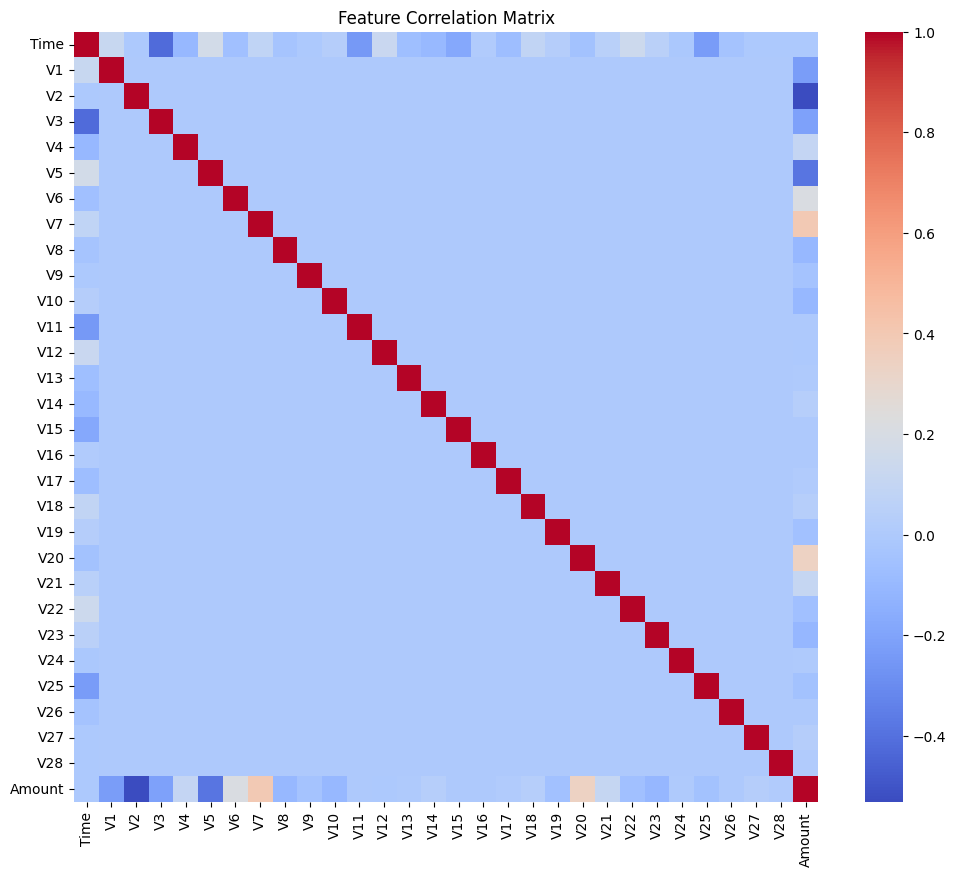

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(data.drop(columns=['Class']).corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Matrix")
plt.show()

###2. Apply PCA for dimensionality reduction:

  * Use StandardScaler before PCA.

  * Keep enough components to retain ≥90% of the variance.




In [ ]:
from sklearn.decomposition import PCA

# Standardize features before PCA
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train2_s)
x_test_scaled = scaler.transform(x_test)

# Apply PCA and determine components for ≥90% variance
pca = PCA()
pca.fit(x_train_scaled)

cum_var = np.cumsum(pca.explained_variance_ratio_)
n_components_90 = np.argmax(cum_var >= 0.90) + 1

print(f"Number of components to retain ≥90% variance: {n_components_90}")

# Apply PCA with the chosen number of components
pca_final = PCA(n_components=n_components_90)
x_train_pca = pca_final.fit_transform(x_train_scaled)
x_test_pca = pca_final.transform(x_test_scaled)

Number of components to retain ≥90% variance: 13


### 3. Build two pipelines:

1. One using the best configuration of Random Forest from the previous section.
2. One using the best configuration of SVM from the previous section.

Both pipelines should include:

* Standardization
* PCA
* The classifier with its best hyperparameters and balancing strategy (e.g., class weights, SMOTE, etc.)

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix

rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components_90)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=0))
])

# Train
rf_pipeline.fit(x_train2_s, y_train2_s)

# Predict
y_pred_rf_pca = rf_pipeline.predict(x_test)
y_proba_rf_pca = rf_pipeline.predict_proba(x_test)[:, 1]

#Metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf_pca)
rf_precision = precision_score(y_test, y_pred_rf_pca)
rf_recall = recall_score(y_test, y_pred_rf_pca)
rf_f1 = f1_score(y_test, y_pred_rf_pca)
rf_auc = roc_auc_score(y_test, y_proba_rf_pca)

# Metrics
print("Random Forest with PCA : ")
print(confusion_matrix(y_test, y_pred_rf_pca))
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")
print(f"ROC-AUC: {rf_auc:.4f}")


Random Forest with PCA : 
[[85238    57]
 [   30   118]]
Accuracy: 0.9990
Precision: 0.6743
Recall: 0.7973
F1-Score: 0.7307
ROC-AUC: 0.9663


In [39]:
# SVM Pipeline with PCA
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components_90)),
    ('svm', SVC(kernel='rbf', probability=True, random_state=0))
])

# Train
svm_pipeline.fit(x_train2_s, y_train2_s)

# Predict
y_pred_svm_pca = svm_pipeline.predict(x_test)
y_proba_svm_pca = svm_pipeline.predict_proba(x_test)[:, 1]

svm_accuracy = accuracy_score(y_test, y_pred_svm_pca)
svm_precision = precision_score(y_test, y_pred_svm_pca)
svm_recall = recall_score(y_test, y_pred_svm_pca)
svm_f1 = f1_score(y_test, y_pred_svm_pca)
svm_auc = roc_auc_score(y_test, y_proba_svm_pca)

# Metrics
print("\nSVM with PCA")
print(confusion_matrix(y_test, y_pred_svm_pca))
print(f"Accuracy: {svm_accuracy:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")
print(f"F1-Score: {svm_f1:.4f}")
print(f"ROC-AUC: {svm_auc:.4f}")


SVM with PCA
[[84340   955]
 [   23   125]]
Accuracy: 0.9886
Precision: 0.1157
Recall: 0.8446
F1-Score: 0.2036
ROC-AUC: 0.9561


After applying PCA for dimensionality reduction, the Random Forest pipeline maintained very high overall accuracy (0.999) and a good balance between precision (0.67) and recall (0.80) for the fraud class, resulting in a solid F1-score (0.73) and a strong ROC-AUC (0.97). The SVM pipeline with PCA achieved high recall (0.84) but very low precision (0.12), meaning it detected most fraud cases but produced many false positives. Overall, Random Forest with PCA provided the best trade-off between correctly detecting fraud and minimizing false alarms, whereas SVM prioritized catching fraud at the cost of a large number of false positives.

# V – Boosting Models for Imbalanced Data

**Objective**: Explore boosting algorithms and how they can help in handling highly imbalanced datasets.

Boosting algorithms (e.g., AdaBoost, Gradient Boosting, XGBoost) iteratively focus on misclassified samples, which often include minority class instances. This makes them naturally more sensitive to class imbalance.


###1. Principle of Boosting :

Boosting is a machine learning technique that builds a strong model by combining several weak models, usually simple decision trees that individually might not perform very well. The main idea is to train these weak learners one after another, where each new model focuses more on the mistakes made by the previous ones. Over time, it gives more weight to difficult cases and less to the easy ones, gradually improving accuracy. The final prediction is made by combining all the weak models, leading to a powerful and well-balanced classifier that performs much better than any single model alone.

###AdaBoost Classifier Model

In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Base learner: a shallow decision tree (stump)
base_estimator = DecisionTreeClassifier(max_depth=1, class_weight='balanced')

# AdaBoost with cost-sensitive base estimator
ada_cost = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=100,
    learning_rate=0.5,
    random_state=0
)

# Train on the sampled, imbalanced data
ada_cost.fit(x_train1_s, y_train1_s)

# Predictions
y_pred_ada = ada_cost.predict(x_test)

# Evaluation
print("AdaBoost (Cost-Sensitive)")
print(confusion_matrix(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))
print("ROC-AUC:", roc_auc_score(y_test, ada_cost.predict_proba(x_test)[:, 1]))


AdaBoost (Cost-Sensitive)
[[84170  1125]
 [   27   121]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.10      0.82      0.17       148

    accuracy                           0.99     85443
   macro avg       0.55      0.90      0.58     85443
weighted avg       1.00      0.99      0.99     85443

ROC-AUC: 0.9497585486301121


###XG Boost Classifier Model

In [41]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Calculate scale_pos_weight = ratio of negative to positive classes
scale_pos_weight = y_train1_s.value_counts()[0] / y_train1_s.value_counts()[1]

# Initialize XGBoost model
xgb_cost = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=0,
    scale_pos_weight=scale_pos_weight,  # handles class imbalance
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train on the sampled, imbalanced data
xgb_cost.fit(x_train1_s, y_train1_s)

# Predict
y_pred_xgb = xgb_cost.predict(x_test)

# Evaluate
print("XGBoost (Cost-Sensitive)")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, xgb_cost.predict_proba(x_test)[:, 1]))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [23:32:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost (Cost-Sensitive)
[[85267    28]
 [   28   120]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.81      0.81      0.81       148

    accuracy                           1.00     85443
   macro avg       0.91      0.91      0.91     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC: 0.9734466074022906


###AdaBoost with PCA

In [42]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Using the same n_components_90 as found earlier (retain ≥90% variance)
pca = PCA(n_components=n_components_90)

ada_pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', pca),
    ('ada', AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=0))
])

ada_pca_pipeline.fit(x_train1_s, y_train1_s)
y_pred_ada_pca = ada_pca_pipeline.predict(x_test)

print("AdaBoost with PCA:")
print(confusion_matrix(y_test, y_pred_ada_pca))
print("Accuracy:", accuracy_score(y_test, y_pred_ada_pca))
print("Precision:", precision_score(y_test, y_pred_ada_pca))
print("Recall:", recall_score(y_test, y_pred_ada_pca))
print("F1-Score:", f1_score(y_test, y_pred_ada_pca))
print("ROC-AUC:", roc_auc_score(y_test, ada_pca_pipeline.predict_proba(x_test)[:,1]))


AdaBoost with PCA:
[[85280    15]
 [   95    53]]
Accuracy: 0.9987125920204113
Precision: 0.7794117647058824
Recall: 0.3581081081081081
F1-Score: 0.49074074074074076
ROC-AUC: 0.9463630595247338


###XG Boost with PCA

In [43]:
xgb_pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', pca),
    ('xgb', XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=0,
        scale_pos_weight=scale_pos_weight,
        use_label_encoder=False,
        eval_metric='logloss'
    ))
])

xgb_pca_pipeline.fit(x_train1_s, y_train1_s)
y_pred_xgb_pca = xgb_pca_pipeline.predict(x_test)

print("\nXGBoost with PCA:")
print(confusion_matrix(y_test, y_pred_xgb_pca))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_pca))
print("Precision:", precision_score(y_test, y_pred_xgb_pca))
print("Recall:", recall_score(y_test, y_pred_xgb_pca))
print("F1-Score:", f1_score(y_test, y_pred_xgb_pca))
print("ROC-AUC:", roc_auc_score(y_test, xgb_pca_pipeline.predict_proba(x_test)[:,1]))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [23:36:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost with PCA:
[[85177   118]
 [   34   114]]
Accuracy: 0.9982210362463865
Precision: 0.49137931034482757
Recall: 0.7702702702702703
F1-Score: 0.6
ROC-AUC: 0.9502422039250106


###Comparing All Boosting Models

In [47]:
# Collect results into a dictionary
results_boosting = {
    "Model": [
        "AdaBoost (Cost-Sensitive)",
        "AdaBoost + PCA",
        "XGBoost (Cost-Sensitive)",
        "XGBoost + PCA"
    ],
    "Accuracy": [
        accuracy_score(y_test, y_pred_ada),
        accuracy_score(y_test, y_pred_ada_pca),
        accuracy_score(y_test, y_pred_xgb),
        accuracy_score(y_test, y_pred_xgb_pca)
    ],
    "Precision": [
        precision_score(y_test, y_pred_ada),
        precision_score(y_test, y_pred_ada_pca),
        precision_score(y_test, y_pred_xgb),
        precision_score(y_test, y_pred_xgb_pca)
    ],
    "Recall": [
        recall_score(y_test, y_pred_ada),
        recall_score(y_test, y_pred_ada_pca),
        recall_score(y_test, y_pred_xgb),
        recall_score(y_test, y_pred_xgb_pca)
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_ada),
        f1_score(y_test, y_pred_ada_pca),
        f1_score(y_test, y_pred_xgb),
        f1_score(y_test, y_pred_xgb_pca)
    ]
}

# Convert results to DataFrame
df_boosting_results = pd.DataFrame(results_boosting)

# Display neatly sorted by F1-score
df_boosting_results = df_boosting_results.sort_values(by="F1-Score", ascending=False).reset_index(drop=True)

print("\nBoosting Model Comparison (With & Without PCA):")
display(df_boosting_results)


Boosting Model Comparison (With & Without PCA):


,Model,Accuracy,Precision,Recall,F1-Score
0,XGBoost (Cost-Sensitive),0.999345,0.810811,0.810811,0.810811
1,XGBoost + PCA,0.998221,0.491379,0.770270,0.600000
2,AdaBoost + PCA,0.998713,0.779412,0.358108,0.490741
3,AdaBoost (Cost-Sensitive),0.986517,0.097111,0.817568,0.173601


The boosting models show some interesting trade-offs between accuracy and how well they capture the minority (fraud) class. XGBoost (Cost-Sensitive) performed the best overall, achieving the highest recall (81%) and precision (81%), indicating a strong balance between correctly detecting frauds and minimizing false alarms. Adding PCA slightly reduced its precision but maintained good recall, showing that dimensionality reduction did not severely hurt performance. AdaBoost, on the other hand, struggled more with class imbalance. It's cost-sensitive version achieved high recall (82%) but very low precision, meaning it detected many frauds but with many false positives. The AdaBoost + PCA model improved precision somewhat but at the cost of recall. Overall, XGBoost without PCA proved to be the most reliable and effective boosting model for this imbalanced dataset.